# Boundary mapping

The purpose of this notebook is to mess around with all the different options available with boundary mapping

In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
module_path = os.path.abspath(os.path.join('..', 'hypedsearch', 'src'))
if module_path not in sys.path:
    sys.path.append(module_path)


import database
import testing_utils
import operator
import collections


#Assumptions:
max_peptide_length = 20
ppm_tolerance = 20

import matplotlib.pyplot as plt

In [2]:
datasets = testing_utils.define_data()

dataset = datasets[0]

input_spectra_path = dataset[0]
input_spectra, boundaries = testing_utils.preprocess_input_spectra(input_spectra_path, ppm_tolerance)

correct_sequences = testing_utils.generate_truth_set(datasets[0])

path = dataset[2]
db = database.build(path)

Loading spectra...
Done


In [3]:
matched_masses_b, matched_masses_y, db = testing_utils.modified_match_masses(boundaries, db, max_peptide_length)
# matched_masses_b, matched_masses_y, db = match_masses(boundaries, db, max_peptide_length)
print('Finished matching masses')

On protein 279/279 [100%]
Sorting the set of protein masses...
Sorting the set of protein masses done
Performing Merge
Done
Finished matching masses


# Grabbing hits

In [4]:
spectrum_num = 0
correct_sequence = correct_sequences[spectrum_num]
print(correct_sequence)

input_spectrum = input_spectra[spectrum_num]

#Remember to add in abundance if it is helpful
b_hits, y_hits, b_set, y_set, misses = testing_utils.find_hits(boundaries, input_spectrum, spectrum_num, matched_masses_b, matched_masses_y)
correct_hits = testing_utils.append_correct_hits(correct_sequence, input_spectrum, ppm_tolerance)

DPQVEQLEL


# Writing hits

In [5]:
testing_utils.write_hits(b_hits, y_hits)

Done


# Clustering b hits

In [6]:
ion = 'b'
testing_utils.create_clusters(ion)
b_sorted_clusters = testing_utils.sort_clusters_by_post_prob(ion, boundaries, matched_masses_b, matched_masses_y)

# Printing data

In [7]:
b_sorted_clusters = sorted(b_sorted_clusters, key=operator.attrgetter('score', 'post_prob', 'pid', 'prior'), reverse = True)
testing_utils.write_b_sorted_cluster(b_sorted_clusters)
for x in b_sorted_clusters:
    post_prob = x.post_prob
    score = x.score
    seq = x.seq
    indices = x.indices
    print(post_prob, score, seq)

0.8674851509837346 7 DPQVEQLE
0.5832415059687787 4 TVFSDFL
0.5689800742992233 4 TQAGVEELDPENKIP
0.5348891652083142 4 PAGDQKDV
0.45824150596877866 4 DPEVQQI
0.42904238878594025 4 GTYFEVKIPSDTFYDN
0.42446275789051985 4 HSLMPMLE
0.381750637069786 4 PDAGAPTSASGLSGHTTL
0.6258241758241758 3 TTFV
0.6258241758241758 3 TTFV
0.5721812218122181 3 TTPGPD
0.5676756625334306 3 KKEECP
0.5570921985815603 3 TTSTRTY
0.549407674478496 3 TTYNSIMK
0.5428270042194093 3 TTQEPIWLT
0.5399705014749262 3 KKDLEEWNQ
0.5379931876241839 3 TTGFSTEVWQ
0.5364167478091529 3 TTLRIEGNQG
0.5309222423146475 3 KKAIPAGCGDE
0.5309222423146475 3 TTTGPRAQIGS
0.5300595238095238 3 TTVESNSSWWTN
0.5280657395701643 3 TTSPNLGTREN
0.5277367773677737 3 TTPATSTTCTAT
0.5265676567656766 3 KKCGWFHPPANE
0.5261603375527427 3 TTEAAPGTGRGA
0.525892857142857 3 TTNPHVFPEGSEP
0.5183733670459334 3 QPDV
0.5178571428571428 3 KHHMY
0.5170879922216821 3 KKEKKSLDSDESED
0.5154565456545654 3 TTQPPAQPASQGSGS
0.5111301625167736 3 TTESVKEQEMKWTDLA
0.50849858

0.4503583587170758 2 TT
0.4503583587170758 2 TT
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.45027851274195

0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.4502785127419579 2 KK
0.45027851274195

0.36553588987217306 2 TKDSGP
0.36553588987217306 2 KPGSDT
0.36553588987217306 2 TNTTAP
0.36553588987217306 2 KPGSDT
0.36553588987217306 2 TASPQT
0.36553588987217306 2 TVNGDV
0.36553588987217306 2 TDALNA
0.36553588987217306 2 TVQAAD
0.36553588987217306 2 TEAGNL
0.36553588987217306 2 KGGVED
0.3654874787259908 2 TFSHEL
0.3654874787259908 2 TELLEE
0.3654874787259908 2 TQEERA
0.3654874787259908 2 KEMQPT
0.3654874787259908 2 TYEHAL
0.3654874787259908 2 KDSQQQ
0.3654874787259908 2 KEMQPT
0.3654874787259908 2 KYQASH
0.3654874787259908 2 KEMQPT
0.3654874787259908 2 TILEEE
0.3654874787259908 2 TAELHY
0.3648351648351648 2 SFIT
0.3648351648351648 2 FSLT
0.3648351648351648 2 FSTI
0.3648351648351648 2 SFLT
0.3648351648351648 2 FSTI
0.3648351648351648 2 FSLT
0.3648351648351648 2 YATI
0.3648351648351648 2 AYIT
0.3648351648351648 2 AYLT
0.3648351648351648 2 FSTL
0.3566006600660066 2 TSAGPHF
0.3566006600660066 2 TAPPTET
0.3566006600660066 2 TALAPED
0.35589970501474927 2 KFMNPFN
0.35589970501474927 2 KFD

0.3056657223796034 2 TVPAYFNDAQRQATKDA
0.3056657223796034 2 KFQDDPDGLHQLDGTPL
0.3056657223796034 2 TISPEEGVSYLENLDET
0.3056657223796034 2 KRKACKNCTCGLAEELE
0.3056657223796034 2 KQWYLFNTGQADGTPGL
0.3055096418732782 2 EILNNPE
0.3055096418732782 2 PQERCPV
0.3055096418732782 2 ELTLHSE
0.3055096418732782 2 KADIGCTPGSGKNYAGV
0.3055096418732782 2 LEDNLPQ
0.3055096418732782 2 FSDFLTV
0.3053050397877984 2 LEMVHRG
0.3053050397877984 2 ELQQNPL
0.3053050397877984 2 IENPNRV
0.3053050397877984 2 IEVHKDT
0.3053050397877984 2 PQEAIQR
0.3047281323877069 2 FSVAYKD
0.3047281323877069 2 PQRESRG
0.30472813238770685 2 TLATMLACLQACAGSVS
0.30442477876106194 2 EIGGAGT
0.3043763676148797 2 FSSPAPQ
0.303284769998651 2 TAEGVLQEALDKDSGHPE
0.303284769998651 2 TFNSLLCPTGAEVSEQIS
0.30112026783414886 2 TAESSVSSSSSHRQSKSSG
0.2975663716814159 2 GPAVD
0.2969717064544651 2 GPASV
0.2969717064544651 2 PGAVS
0.2969717064544651 2 PGAVS
0.2968087959238402 2 EIPAYSAF
0.2968087959238402 2 ELASMFLS
0.29657481328869434 2 ELTHNWGT


0.14125624820811986 2 AFNNRPPSTWLTAY
0.14125624820811986 2 PTEQQQPQPHHIPT
0.14052923149457805 2 DVNDNAPQFVASH
0.1404747387225485 2 FNNLSQSNMTQKVE
0.13848322729901677 2 GAGAVPVGVDDPEDGG
0.13661810333198432 2 HEKDAGVVCSNDTTGLHI
0.13171225937183384 2 QVSALLGEEDEEALH
0.13021832846613823 2 VSLDENFHPLNELI
0.12356519742883379 2 DSYVGDEAQSKRGIL
0.12356519742883379 2 DSYVGDEAQSKRGIL
0.11778693450081551 2 GSCTSCPSSIITLKSGIQN
0.11712083073873653 2 LNFSVFHYEIANSPEE
0.11696475023241136 2 SSSGTITDEDELTGIL
0.11565456940951012 2 AGAAPAGGAAPSTAAAPAEE
0.1144892517913681 2 ISGFQIEETIDRETSGN
0.11028368794326242 2 SYAGGRGSYGDLGGPII
0.10591634894601942 2 ADQVTPVSHIGCPNTTQQ
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379

0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.250179179

0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.250179179

0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.250179179

0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.250179179

0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.250179179

0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.250179179

0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.250179179

0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.250179179

0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.250179179

0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.2501791793585379 1 T
0.250179179

0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097

0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097

0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097

0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097

0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097

0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097

0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097

0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097

0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097

0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097

0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097

0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097

0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097

0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097

0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097

0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097895 1 K
0.25013925637097

0.20128040973111397 1 QP
0.20128040973111397 1 PQ
0.20128040973111397 1 QP
0.20128040973111397 1 PQ
0.20128040973111397 1 PQ
0.20128040973111397 1 QP
0.20128040973111397 1 PQ
0.20128040973111397 1 QP
0.20128040973111397 1 QP
0.20128040973111397 1 PQ
0.20128040973111397 1 QP
0.20128040973111397 1 QP
0.20128040973111397 1 QP
0.20128040973111397 1 QP
0.20128040973111397 1 PQ
0.20128040973111397 1 PQ
0.20128040973111397 1 PQ
0.20128040973111397 1 QP
0.20128040973111397 1 QP
0.20128040973111397 1 QP
0.20128040973111397 1 QP
0.20128040973111397 1 QP
0.20128040973111397 1 PQ
0.20128040973111397 1 QP
0.20128040973111397 1 QP
0.20128040973111397 1 PQ
0.20128040973111397 1 QP
0.20128040973111397 1 QP
0.20128040973111397 1 PQ
0.20128040973111397 1 QP
0.20128040973111397 1 QP
0.20128040973111397 1 PQ
0.20128040973111397 1 PQ
0.20128040973111397 1 QP
0.20128040973111397 1 PQ
0.20128040973111397 1 QP
0.20128040973111397 1 QP
0.20128040973111397 1 PQ
0.20128040973111397 1 QP
0.20128040973111397 1 PQ


0.20098231827111984 1 FS
0.20098231827111984 1 SF
0.20098231827111984 1 FS
0.20098231827111984 1 SF
0.20098231827111984 1 FS
0.20098231827111984 1 YA
0.20098231827111984 1 FS
0.20098231827111984 1 FS
0.20098231827111984 1 AY
0.20098231827111984 1 FS
0.20098231827111984 1 FS
0.20098231827111984 1 AY
0.20098231827111984 1 AY
0.20098231827111984 1 AY
0.20098231827111984 1 SF
0.20098231827111984 1 YA
0.20098231827111984 1 AY
0.20098231827111984 1 AY
0.20098231827111984 1 YA
0.20098231827111984 1 SF
0.20098231827111984 1 AY
0.20098231827111984 1 FS
0.20098231827111984 1 YA
0.20098231827111984 1 AY
0.20098231827111984 1 FS
0.20098231827111984 1 FS
0.20098231827111984 1 FS
0.20098231827111984 1 YA
0.20098231827111984 1 AY
0.20098231827111984 1 SF
0.20098231827111984 1 SF
0.20098231827111984 1 FS
0.20098231827111984 1 FS
0.20098231827111984 1 SF
0.20098231827111984 1 FS
0.20098231827111984 1 SF
0.20098231827111984 1 FS
0.20098231827111984 1 FS
0.20098231827111984 1 SF
0.20098231827111984 1 FS


0.20098231827111984 1 FS
0.20098231827111984 1 SF
0.20098231827111984 1 FS
0.20098231827111984 1 SF
0.20098231827111984 1 SF
0.20098231827111984 1 SF
0.20098231827111984 1 FS
0.20098231827111984 1 FS
0.20098231827111984 1 YA
0.20098231827111984 1 YA
0.20098231827111984 1 SF
0.20098231827111984 1 FS
0.20098231827111984 1 AY
0.20098231827111984 1 YA
0.20098231827111984 1 FS
0.20098231827111984 1 SF
0.20098231827111984 1 FS
0.20098231827111984 1 AY
0.20098231827111984 1 AY
0.20098231827111984 1 YA
0.20098231827111984 1 AY
0.20098231827111984 1 AY
0.20098231827111984 1 YA
0.20098231827111984 1 AY
0.20098231827111984 1 SF
0.20098231827111984 1 YA
0.20098231827111984 1 AY
0.20098231827111984 1 FS
0.20098231827111984 1 YA
0.20098231827111984 1 YA
0.20098231827111984 1 FS
0.20098231827111984 1 SF
0.20098231827111984 1 YA
0.20098231827111984 1 SF
0.20098231827111984 1 SF
0.20098231827111984 1 SF
0.20098231827111984 1 SF
0.20098231827111984 1 SF
0.20098231827111984 1 FS
0.20098231827111984 1 FS


0.20041322314049587 1 EL
0.20041322314049587 1 EI
0.20041322314049587 1 LE
0.20041322314049587 1 EL
0.20041322314049587 1 LE
0.20041322314049587 1 EL
0.20041322314049587 1 EL
0.20041322314049587 1 LE
0.20041322314049587 1 EI
0.20041322314049587 1 EL
0.20041322314049587 1 LE
0.20041322314049587 1 EL
0.20041322314049587 1 LE
0.20041322314049587 1 LE
0.20041322314049587 1 LE
0.20041322314049587 1 EL
0.20041322314049587 1 LE
0.20041322314049587 1 EI
0.20041322314049587 1 EL
0.20041322314049587 1 LE
0.20041322314049587 1 EL
0.20041322314049587 1 EL
0.20041322314049587 1 EL
0.20041322314049587 1 LE
0.20041322314049587 1 LE
0.20041322314049587 1 EL
0.20041322314049587 1 EL
0.20041322314049587 1 EL
0.20041322314049587 1 LE
0.20041322314049587 1 EL
0.20041322314049587 1 LE
0.20041322314049587 1 EL
0.20041322314049587 1 LE
0.20041322314049587 1 EL
0.20041322314049587 1 LE
0.20041322314049587 1 IE
0.20041322314049587 1 EL
0.20041322314049587 1 LE
0.20041322314049587 1 LE
0.20041322314049587 1 EI


0.20041322314049587 1 EL
0.20041322314049587 1 EL
0.20041322314049587 1 IE
0.20041322314049587 1 EL
0.20041322314049587 1 LE
0.20041322314049587 1 EL
0.20041322314049587 1 IE
0.20041322314049587 1 EL
0.20041322314049587 1 EL
0.20041322314049587 1 EI
0.20041322314049587 1 IE
0.20041322314049587 1 IE
0.20041322314049587 1 EL
0.20041322314049587 1 IE
0.20041322314049587 1 LE
0.20041322314049587 1 EI
0.20041322314049587 1 EL
0.20041322314049587 1 LE
0.20041322314049587 1 EL
0.20041322314049587 1 EL
0.20041322314049587 1 EI
0.20041322314049587 1 IE
0.20041322314049587 1 IE
0.20041322314049587 1 EL
0.20041322314049587 1 EI
0.20041322314049587 1 IE
0.20041322314049587 1 EL
0.20041322314049587 1 EL
0.20041322314049587 1 EI
0.20041322314049587 1 LE
0.20041322314049587 1 EL
0.20041322314049587 1 IE
0.20041322314049587 1 LE
0.20041322314049587 1 IE
0.20041322314049587 1 EL
0.20041322314049587 1 IE
0.20041322314049587 1 LE
0.20041322314049587 1 EL
0.20041322314049587 1 LE
0.20041322314049587 1 EL


0.20041322314049587 1 LE
0.20041322314049587 1 IE
0.20041322314049587 1 LE
0.20041322314049587 1 LE
0.20041322314049587 1 LE
0.20041322314049587 1 EL
0.20041322314049587 1 LE
0.20041322314049587 1 IE
0.20041322314049587 1 LE
0.20041322314049587 1 LE
0.20041322314049587 1 EL
0.20041322314049587 1 EI
0.20041322314049587 1 EI
0.20041322314049587 1 EL
0.20041322314049587 1 EL
0.20041322314049587 1 EL
0.20041322314049587 1 LE
0.20041322314049587 1 LE
0.20041322314049587 1 IE
0.20041322314049587 1 IE
0.20041322314049587 1 EL
0.20041322314049587 1 EL
0.20041322314049587 1 EL
0.20041322314049587 1 EI
0.20041322314049587 1 EL
0.20041322314049587 1 LE
0.20041322314049587 1 LE
0.20041322314049587 1 EI
0.20041322314049587 1 IE
0.20041322314049587 1 LE
0.20041322314049587 1 EI
0.20041322314049587 1 LE
0.20041322314049587 1 IE
0.20041322314049587 1 LE
0.20041322314049587 1 LE
0.20041322314049587 1 EI
0.20041322314049587 1 EI
0.20041322314049587 1 LE
0.20041322314049587 1 EL
0.20041322314049587 1 EL


0.20041322314049587 1 EL
0.20041322314049587 1 EL
0.20041322314049587 1 EI
0.20041322314049587 1 EL
0.20041322314049587 1 EL
0.20041322314049587 1 IE
0.20041322314049587 1 EL
0.20041322314049587 1 LE
0.20041322314049587 1 LE
0.20041322314049587 1 EL
0.20041322314049587 1 EI
0.20041322314049587 1 LE
0.20041322314049587 1 EL
0.20041322314049587 1 LE
0.20041322314049587 1 EL
0.20041322314049587 1 LE
0.20041322314049587 1 IE
0.20041322314049587 1 EL
0.20041322314049587 1 EI
0.20041322314049587 1 IE
0.20041322314049587 1 EL
0.20041322314049587 1 LE
0.20041322314049587 1 EI
0.20041322314049587 1 LE
0.20041322314049587 1 LE
0.20041322314049587 1 LE
0.20041322314049587 1 LE
0.20041322314049587 1 LE
0.20041322314049587 1 LE
0.20041322314049587 1 EL
0.20041322314049587 1 LE
0.20041322314049587 1 LE
0.20041322314049587 1 LE
0.20041322314049587 1 EI
0.20041322314049587 1 EL
0.20041322314049587 1 IE
0.20041322314049587 1 EL
0.20041322314049587 1 LE
0.20041322314049587 1 EL
0.20041322314049587 1 EL


0.20041322314049587 1 EL
0.20041322314049587 1 EI
0.20041322314049587 1 EL
0.20041322314049587 1 LE
0.20041322314049587 1 EL
0.20041322314049587 1 LE
0.20041322314049587 1 EL
0.20041322314049587 1 EL
0.20041322314049587 1 EI
0.20041322314049587 1 EL
0.20041322314049587 1 EL
0.20041322314049587 1 EI
0.20041322314049587 1 EL
0.20041322314049587 1 LE
0.20041322314049587 1 EL
0.20041322314049587 1 EL
0.20041322314049587 1 IE
0.20041322314049587 1 LE
0.20041322314049587 1 EI
0.20041322314049587 1 EL
0.20041322314049587 1 LE
0.20041322314049587 1 EL
0.20041322314049587 1 EL
0.20041322314049587 1 EL
0.20041322314049587 1 EL
0.20041322314049587 1 LE
0.20041322314049587 1 IE
0.20041322314049587 1 EL
0.20041322314049587 1 IE
0.20041322314049587 1 LE
0.20041322314049587 1 EL
0.20041322314049587 1 EL
0.20041322314049587 1 EI
0.20041322314049587 1 EL
0.20041322314049587 1 EL
0.20041322314049587 1 EL
0.20041322314049587 1 LE
0.20041322314049587 1 EL
0.20041322314049587 1 LE
0.20041322314049587 1 EI


0.17261904761904762 1 NHP
0.17261904761904762 1 NHP
0.17261904761904762 1 NHP
0.17261904761904762 1 NHP
0.17261904761904762 1 NHP
0.17261904761904762 1 HPN
0.17261904761904762 1 NHP
0.17261904761904762 1 HNP
0.17261904761904762 1 NHP
0.17261904761904762 1 PNH
0.17261904761904762 1 NHP
0.17261904761904762 1 NPH
0.17261904761904762 1 NPH
0.17261904761904762 1 HPN
0.17261904761904762 1 HPN
0.17261904761904762 1 HNP
0.17261904761904762 1 NHP
0.17261904761904762 1 PNH
0.17261904761904762 1 NPH
0.17261904761904762 1 PHN
0.17261904761904762 1 NPH
0.17261904761904762 1 HNP
0.17261904761904762 1 NPH
0.17261904761904762 1 HNP
0.17261904761904762 1 HPN
0.17261904761904762 1 NPH
0.17261904761904762 1 HPN
0.17261904761904762 1 NHP
0.17039800995024876 1 ENP
0.17039800995024876 1 ENP
0.17039800995024876 1 DPQ
0.17039800995024876 1 ENP
0.17039800995024876 1 NPE
0.17039800995024876 1 DPQ
0.17039800995024876 1 ENP
0.17039800995024876 1 PEN
0.17039800995024876 1 ENP
0.17039800995024876 1 NPE
0.1703980099

0.16794707639778061 1 GAP
0.16794707639778061 1 PGA
0.16794707639778061 1 AGP
0.16794707639778061 1 APG
0.16794707639778061 1 PGA
0.16794707639778061 1 APG
0.16794707639778061 1 PAG
0.16794707639778061 1 AGP
0.16794707639778061 1 GPA
0.16794707639778061 1 PAG
0.16794707639778061 1 PGA
0.16794707639778061 1 APG
0.16794707639778061 1 APG
0.16794707639778061 1 PGA
0.16794707639778061 1 AGP
0.16794707639778061 1 APG
0.16794707639778061 1 GPA
0.16794707639778061 1 APG
0.16794707639778061 1 PAG
0.16794707639778061 1 APG
0.16794707639778061 1 AGP
0.16794707639778061 1 PGA
0.16794707639778061 1 GAP
0.16794707639778061 1 APG
0.16794707639778061 1 APG
0.16794707639778061 1 PGA
0.16794707639778061 1 APG
0.16794707639778061 1 PGA
0.16794707639778061 1 GPA
0.16794707639778061 1 GPA
0.16794707639778061 1 GPA
0.16794707639778061 1 AGP
0.16794707639778061 1 PGA
0.16794707639778061 1 PGA
0.16794707639778061 1 PAG
0.16794707639778061 1 GPA
0.16794707639778061 1 PAG
0.16794707639778061 1 GAP
0.1679470763

0.14550966275104205 1 PSLN
0.14550966275104205 1 SLNP
0.14550966275104205 1 VSPQ
0.14550966275104205 1 SPQV
0.14550966275104205 1 VNTP
0.14550966275104205 1 PSLN
0.14550966275104205 1 NVTP
0.14550966275104205 1 EGKP
0.14550966275104205 1 GKPE
0.14550966275104205 1 PNVT
0.14550966275104205 1 LNSP
0.14550966275104205 1 NPSI
0.14550966275104205 1 SPLN
0.14550966275104205 1 AKDP
0.14550966275104205 1 SLNP
0.14550966275104205 1 LNPS
0.14550966275104205 1 SVPQ
0.14550966275104205 1 PVQS
0.14550966275104205 1 PNSL
0.14550966275104205 1 EKGP
0.14550966275104205 1 VTNP
0.14550966275104205 1 NSLP
0.14550966275104205 1 GEKP
0.14550966275104205 1 VSQP
0.14550966275104205 1 PNSL
0.14550966275104205 1 GKPE
0.14550966275104205 1 PSLN
0.14550966275104205 1 SLNP
0.14550966275104205 1 APDK
0.14550966275104205 1 PLNS
0.14550966275104205 1 SPVQ
0.14550966275104205 1 SNIP
0.14550966275104205 1 VQPS
0.14550966275104205 1 PEKG
0.14550966275104205 1 PVQS
0.14550966275104205 1 LNSP
0.14550966275104205 1 EGPK
0

0.1432703659976387 1 LHAY
0.1432703659976387 1 HAYI
0.1432703659976387 1 DRRG
0.1432703659976387 1 WAIN
0.1432703659976387 1 IHAY
0.1432703659976387 1 HFTV
0.1432703659976387 1 SIFH
0.1432703659976387 1 WIQG
0.1432703659976387 1 VQAW
0.1432703659976387 1 EEIL
0.1432703659976387 1 WNLA
0.1432703659976387 1 GDRR
0.1432703659976387 1 DRRG
0.1432703659976387 1 ILEE
0.1432703659976387 1 WANL
0.1432703659976387 1 DRRG
0.1432703659976387 1 DRRG
0.1432703659976387 1 EEII
0.1432703659976387 1 MKQP
0.1432703659976387 1 HFIS
0.1432703659976387 1 FISH
0.1432703659976387 1 DRGR
0.1432703659976387 1 LFSH
0.1432703659976387 1 LWQG
0.1432703659976387 1 LLEE
0.1432703659976387 1 EELI
0.1432703659976387 1 PCRK
0.1432703659976387 1 EEIL
0.1432703659976387 1 EELL
0.1432703659976387 1 EEIL
0.1432703659976387 1 HFLS
0.1432703659976387 1 EELL
0.1432703659976387 1 LLEE
0.1432703659976387 1 WAAR
0.1432703659976387 1 ILEE
0.1432703659976387 1 AHYI
0.1432703659976387 1 HFSI
0.1432703659976387 1 MKPQ
0.1432703659

0.12718818380743982 1 AAGGT
0.12718818380743982 1 AGASA
0.12718818380743982 1 WEDKR
0.12718818380743982 1 EDKRW
0.12718818380743982 1 SGGGV
0.12718818380743982 1 VGGGS
0.12718818380743982 1 VGSGG
0.12718818380743982 1 SAAAG
0.12718818380743982 1 WREDK
0.12718818380743982 1 AAGTG
0.12718818380743982 1 SGAAA
0.12718818380743982 1 AATGG
0.12718818380743982 1 AAGSA
0.12718818380743982 1 ATGGA
0.12718818380743982 1 SAGAA
0.12718818380743982 1 GGVGS
0.12718818380743982 1 GAGTA
0.12718818380743982 1 ASAAG
0.12718818380743982 1 DWREK
0.12718818380743982 1 AAASG
0.12628040973111396 1 PAANP
0.12628040973111396 1 GPQPA
0.12628040973111396 1 QGAPP
0.12628040973111396 1 AQPPG
0.12628040973111396 1 PPAAN
0.12628040973111396 1 AQGPP
0.12628040973111396 1 APPNA
0.12598231827111983 1 PNGEA
0.12598231827111983 1 NEAPG
0.12598231827111983 1 EPQGG
0.12598231827111983 1 GNAPE
0.12598231827111983 1 NAPEG
0.12598231827111983 1 PDAAN
0.12598231827111983 1 ENAPG
0.12598231827111983 1 ADANP
0.12598231827111983 

0.11329929491855092 1 FAFFCV
0.11329929491855092 1 VTWAEQ
0.11329929491855092 1 HVDIYS
0.11329929491855092 1 PEKKEC
0.11329929491855092 1 NFEPRA
0.11329929491855092 1 SDRAWV
0.11329929491855092 1 IQELCQ
0.11329929491855092 1 PPEEVY
0.11329929491855092 1 RREASD
0.11329929491855092 1 VENSRE
0.11329929491855092 1 ENSREV
0.11329929491855092 1 ECIQQL
0.11329929491855092 1 SRIDDQ
0.11329929491855092 1 WLDRGS
0.11329929491855092 1 RRDSCP
0.11329929491855092 1 DAQWLT
0.11329929491855092 1 HEIFTS
0.11329929491855092 1 LGSDWR
0.11329929491855092 1 GSDWRL
0.11329929491855092 1 IIEMMP
0.11329929491855092 1 AREDDK
0.11329929491855092 1 PMIMEI
0.11329929491855092 1 MIMEIP
0.11329929491855092 1 QLMDQV
0.11329929491855092 1 NPLQFD
0.11329929491855092 1 PLQFDN
0.11329929491855092 1 LQFDNP
0.11329929491855092 1 NKYDPP
0.11329929491855092 1 ITLEEE
0.11329929491855092 1 SERDIN
0.11329929491855092 1 EQNMVL
0.11329929491855092 1 SQQQKD
0.11329929491855092 1 MVQQDI
0.11329929491855092 1 LMPMLE
0.113299294918

0.10218818380743983 1 CVPGVCR
0.10218818380743983 1 GAFEGPR
0.10218818380743983 1 ACLLNPC
0.10218818380743983 1 DACPKSL
0.10218818380743983 1 MNSPVVS
0.10218818380743983 1 GSRDALD
0.10218818380743983 1 SASRPDT
0.10218818380743983 1 SLPGQMT
0.10218818380743983 1 QSLASMP
0.10218818380743983 1 GVMEQLG
0.10218818380743983 1 VSTQPAM
0.10218818380743983 1 EAQLVAC
0.10218818380743983 1 GESLDGR
0.10218818380743983 1 VCNDVLA
0.094640434192673 1 FGGSGTSS
0.094640434192673 1 SPHSSGGA
0.094640434192673 1 PHSSGGAS
0.09459912780945992 1 FQHEEFYR
0.09420942094209421 1 GSSASPNP
0.09420942094209421 1 SGNTSPPG
0.09420942094209421 1 GNTSPPGS
0.09407364787111623 1 RDWKNQLE
0.09407364787111623 1 FRTYNYPK
0.09407364787111623 1 WEQNRRSL
0.09407364787111623 1 REREEIEK
0.09407364787111623 1 FQQLPYHR
0.09407364787111623 1 NKTIRYMY
0.09407364787111623 1 RKEIEERE
0.09407364787111623 1 WWQLRDNA
0.09407364787111623 1 WWLGIWLD
0.09407364787111623 1 LYEKFLEF
0.09407364787111623 1 DNQKLWER
0.09407364787111623 1 EEEWRR

0.08616619452313502 1 NSNPAMAPR
0.08616619452313502 1 DNGIPQKAD
0.08616619452313502 1 LASMPPMNP
0.08616619452313502 1 VARADAHSM
0.08616619452313502 1 EQGSPRNLG
0.08616619452313502 1 ASSISHMPQ
0.08608815426997245 1 AGAPVPVDC
0.08608815426997245 1 GAVPVGVDD
0.08608815426997245 1 AETPGAVSP
0.08598585322723254 1 VRAAEAGAP
0.08598585322723254 1 RAAEAGAPV
0.08598585322723254 1 SPAAQATVP
0.08598585322723254 1 SPAPQSIAA
0.08598585322723254 1 AATGIQPSP
0.08598585322723254 1 PAEAKSPAA
0.08598585322723254 1 ALAGAPLDN
0.08598585322723254 1 LAGAPLDNA
0.08598585322723254 1 PAQPTGISA
0.08598585322723254 1 PSKPSSAPA
0.08598585322723254 1 AQLELGGGP
0.08598585322723254 1 PPAVAMQAG
0.08598585322723254 1 PAVAMQAGP
0.08598585322723254 1 PCPRGALGA
0.08598585322723254 1 SAPPAVSNV
0.08569739952718676 1 SPGEAKSPG
0.08569739952718676 1 SPGEAKSPG
0.08569739952718676 1 SPGEAKSPG
0.08569739952718676 1 SPGEAKSPG
0.08569739952718676 1 IPGGQEAAS
0.08569739952718676 1 NTTPTGAAP
0.08569739952718676 1 AANVPAGTE
0.085697

0.07589285714285714 1 WLMFEWNPAFA
0.07589285714285714 1 MYRNEMKSHSE
0.07589285714285714 1 YRNEMKSHSEM
0.07511860832894043 1 CLYGADGNIVM
0.07511860832894043 1 EVGQNGQSHSL
0.07511860832894043 1 SATFPMQCSAL
0.07511860832894043 1 VDNPVGTGFSY
0.07511860832894043 1 DNPVGTGFSYV
0.07511860832894043 1 LAGYCQACDVL
0.07511860832894043 1 FESRVSDTGSA
0.07511860832894043 1 SEPIPESNEGP
0.07511860832894043 1 PGTGDLSDTHR
0.07511860832894043 1 DSELSIHNGPS
0.07511860832894043 1 ESNTAGMDIFA
0.07511860832894043 1 VVACSVDSQFT
0.07511860832894043 1 AGEIAMQANNH
0.07511860832894043 1 GQGYEDLSLCA
0.07511860832894043 1 SSTWSSLVMAS
0.07511860832894043 1 REGSHSPLDSA
0.07511860832894043 1 ACSLAKTAFDE
0.07511860832894043 1 CSLAKTAFDEA
0.07511860832894043 1 LQSSSEVGYDA
0.07511860832894043 1 FDKDGDGSITT
0.07511860832894043 1 STGCLKMKGQC
0.07511860832894043 1 EGGTTNPHVFP
0.07511860832894043 1 GGTTNPHVFPE
0.07511860832894043 1 GTTNPHVFPEG
0.07511860832894043 1 QESHGRGAEGQ
0.07511860832894043 1 ACSLAKTAFDE
0.075118608328

0.06486406619385343 1 WVYWVPTQYVDAI
0.06486406619385343 1 ESQENIFFPSKWQ
0.06486406619385343 1 LRCDEIRDLFMTK
0.06486406619385343 1 IGFLYRHFWADSK
0.06486406619385343 1 LKYAEMEMKNRQV
0.06486406619385343 1 VVRWLNEQRYYGG
0.06486406619385343 1 SKIEKKYDEELEE
0.06486406619385343 1 LQQHMKKCGWFHP
0.06486406619385343 1 FLDHKTLYYDVEP
0.06486406619385343 1 LDHKTLYYDVEPF
0.06486406619385343 1 DHKTLYYDVEPFL
0.06486406619385343 1 VSRTFSFHVSWRM
0.06486406619385343 1 ERREAQDSSSYRR
0.06486406619385343 1 HLFYSFERGNELQ
0.06486406619385343 1 SGLLFWLMFEWNP
0.06486406619385343 1 VMYEKEAKQQEEK
0.06486406619385343 1 YREKIEKELETVC
0.06486406619385343 1 YKEAFEISKEHMQ
0.06471238938053098 1 EAKTGADTTAAGP
0.06471238938053098 1 GAIDDSLIGGNAS
0.06471238938053098 1 LNGGPGCSSLDGL
0.06471238938053098 1 NGGPGCSSLDGLL
0.06471238938053098 1 SSPSSPTALANGT
0.06328781512605042 1 GSSSGTITDEDELT
0.06328781512605042 1 EQFALEAGGYQAGA
0.06328781512605042 1 SSDLFGSPEEGISS
0.06328781512605042 1 SDLFGSPEEGISSS
0.06328781512605042 1 GS

0.057919621749408984 1 PKAYLWHGEASGPAR
0.057919621749408984 1 VDQAGKSSDNRSRGY
0.057919621749408984 1 NANTNTEVLKNMGYA
0.057919621749408984 1 VEQILEDVRGAPAQD
0.057919621749408984 1 QQKDNGCFRSSGSLL
0.057919621749408984 1 QISLNISYIGSRSDS
0.057919621749408984 1 VFIFNIQNDTDVGGT
0.057919621749408984 1 FIFNIQNDTDVGGTV
0.057919621749408984 1 FLLAARTSCSTGQRE
0.057919621749408984 1 RTSCSTGQREAKKTS
0.057919621749408984 1 SHSISELSPDSEVPR
0.057919621749408984 1 HSISELSPDSEVPRS
0.057919621749408984 1 EQNIDCGGGYVKLFP
0.057919621749408984 1 CLLALTSAHDKPSFH
0.057919621749408984 1 IHTNGRVNVEVSAED
0.057919621749408984 1 HTNGRVNVEVSAEDL
0.057919621749408984 1 GAFTVFSDFLTYKSG
0.057919621749408984 1 SGANKEKLEASITEY
0.057919621749408984 1 VEVTEKMTTVLSESS
0.057919621749408984 1 EEGKLFVGGLNFNTD
0.057919621749408984 1 EGKLFVGGLNFNTDE
0.057919621749408984 1 WYLFNTGQADGTPGL
0.05546444013717012 1 IHETTYNSIMKCDIDI
0.05546444013717012 1 DNPPYDKGAFRIEINF
0.05546444013717012 1 VDYEATRIEGLPPSWY
0.05546444013717012 1 LKD

# Clustering y_hits

In [8]:
ion = 'y'
testing_utils.create_clusters(ion)
y_sorted_clusters = testing_utils.sort_clusters_by_post_prob(ion, boundaries, matched_masses_b, matched_masses_y)

# Printing data

In [9]:
testing_utils.write_y_sorted_cluster(y_sorted_clusters)  
y_sorted_clusters = sorted(y_sorted_clusters, key=operator.attrgetter('score', 'post_prob', 'pid', 'prior'), reverse = True)
for x in y_sorted_clusters:
    post_prob = x.post_prob
    score = x.score
    seq = x.seq
    indices = x.indices
    print(post_prob, score, seq)

0.7857723577235773 5 LDSFSEI
0.6975386779184247 4 CGLYEL
0.6975386779184247 4 HPDSEL
0.5330623306233063 4 LESYGLE
0.483033033033033 4 SSNWVGKGFFAVYEAIC
0.42394212394212394 4 EISSIDEF
0.42394212394212394 4 EIPHSELD
0.41172391549750037 4 FVDLTMPYSV
0.6505494505494506 3 HICL
0.6102990033222592 3 ITCI
0.6102990033222592 3 LTCI
0.6102990033222592 3 TLCI
0.5978738652651696 3 FSCL
0.5978738652651696 3 SFCL
0.5978738652651696 3 AYCL
0.5844339622641509 3 NNPEL
0.5734567901234567 3 DPLEEL
0.5734567901234567 3 HVMSEI
0.5721001221001221 3 PENPEI
0.5721001221001221 3 YNVSCI
0.5692411924119242 3 HWEPEI
0.5654639175257732 3 TEEKMEL
0.5606761565836299 3 YQASLEL
0.5606761565836299 3 KPCLFCL
0.5581300813008131 3 ESYGLEL
0.5581300813008131 3 SFSEVEL
0.5581300813008131 3 YGDLTEI
0.5581300813008131 3 FSESVEL
0.5563730084348641 3 SDIAMTEL
0.5515852474927209 3 GYISAAEL
0.549017199017199 3 PIDHLCEL
0.5475513428120063 3 DPQVEQLEL
0.5475513428120063 3 HGEIIYPEI
0.5454301075268817 3 YENLNDQEL
0.5454301075268817 

0.45084781687155573 2 EI
0.45084781687155573 2 EL
0.45084781687155573 2 EL
0.45084781687155573 2 EL
0.45084781687155573 2 EL
0.45084781687155573 2 EL
0.45084781687155573 2 EI
0.45084781687155573 2 EL
0.45084781687155573 2 EL
0.45084781687155573 2 EI
0.45084781687155573 2 EL
0.45084781687155573 2 EI
0.45084781687155573 2 EL
0.45084781687155573 2 EL
0.45084781687155573 2 EL
0.45084781687155573 2 EI
0.45084781687155573 2 EI
0.45084781687155573 2 EL
0.45084781687155573 2 EL
0.45084781687155573 2 EL
0.45084781687155573 2 EL
0.45084781687155573 2 EL
0.45084781687155573 2 EI
0.45084781687155573 2 EL
0.45084781687155573 2 EL
0.45084781687155573 2 EI
0.45084781687155573 2 EI
0.45084781687155573 2 EL
0.45084781687155573 2 EL
0.45084781687155573 2 EL
0.45084781687155573 2 EL
0.45084781687155573 2 EL
0.45084781687155573 2 EL
0.45084781687155573 2 EL
0.45084781687155573 2 EL
0.45084781687155573 2 EL
0.45084781687155573 2 EL
0.45084781687155573 2 EI
0.45084781687155573 2 EI
0.45084781687155573 2 EI


0.45084781687155573 2 EL
0.45084781687155573 2 EL
0.45084781687155573 2 EI
0.45084781687155573 2 EL
0.45084781687155573 2 EI
0.45084781687155573 2 EI
0.45084781687155573 2 EI
0.45084781687155573 2 EI
0.45084781687155573 2 EL
0.45084781687155573 2 EL
0.45084781687155573 2 EL
0.45084781687155573 2 EI
0.45084781687155573 2 EL
0.45084781687155573 2 EL
0.45084781687155573 2 EL
0.45084781687155573 2 EI
0.45084781687155573 2 EI
0.45084781687155573 2 EL
0.45084781687155573 2 EL
0.45084781687155573 2 EI
0.45084781687155573 2 EL
0.45084781687155573 2 EL
0.45084781687155573 2 EI
0.45084781687155573 2 EL
0.45084781687155573 2 EL
0.45084781687155573 2 EL
0.45084781687155573 2 EI
0.45084781687155573 2 EL
0.45084781687155573 2 EL
0.45084781687155573 2 EI
0.45084781687155573 2 EL
0.45084781687155573 2 EL
0.45084781687155573 2 EL
0.45084781687155573 2 EL
0.45084781687155573 2 EL
0.45084781687155573 2 EI
0.45084781687155573 2 EI
0.45084781687155573 2 EL
0.45084781687155573 2 EI
0.45084781687155573 2 EL


0.45084781687155573 2 EL
0.45084781687155573 2 EI
0.45084781687155573 2 EI
0.45084781687155573 2 EL
0.45084781687155573 2 EL
0.45084781687155573 2 EL
0.45084781687155573 2 EI
0.45084781687155573 2 EI
0.45084781687155573 2 EI
0.45084781687155573 2 EL
0.45084781687155573 2 EL
0.45084781687155573 2 EL
0.45084781687155573 2 EI
0.45084781687155573 2 EI
0.45084781687155573 2 EL
0.45084781687155573 2 EL
0.45084781687155573 2 EL
0.45084781687155573 2 EI
0.45084781687155573 2 EL
0.45084781687155573 2 EI
0.45084781687155573 2 EL
0.45084781687155573 2 EL
0.45084781687155573 2 EL
0.45084781687155573 2 EL
0.45084781687155573 2 EL
0.45084781687155573 2 EI
0.45084781687155573 2 EL
0.45084781687155573 2 EL
0.45084781687155573 2 EL
0.45084781687155573 2 EL
0.45084781687155573 2 EL
0.45084781687155573 2 EI
0.45084781687155573 2 EL
0.45084781687155573 2 EL
0.45084781687155573 2 EL
0.45084781687155573 2 EL
0.45084781687155573 2 EI
0.45084781687155573 2 EL
0.45084781687155573 2 EL
0.45084781687155573 2 EI


0.35711743772241994 2 STRSPYL
0.35711743772241994 2 VPDHKDL
0.35711743772241994 2 FSNKNTL
0.35711743772241994 2 MQPTHPI
0.35711743772241994 2 QSLFTDL
0.35711743772241994 2 FLKDMGL
0.35711743772241994 2 NVDISYL
0.35711743772241994 2 YVLSDNI
0.35711743772241994 2 MQPTHPI
0.3562893081761006 2 GPGAGDL
0.35554016620498613 2 SQLMYGL
0.35554016620498613 2 HLNAEDI
0.35554016620498613 2 TSTMMKI
0.355420054200542 2 CAPNRHL
0.355420054200542 2 QFSTQSL
0.355420054200542 2 FCVIDTI
0.355420054200542 2 CGLYELL
0.355420054200542 2 PHSELDL
0.355420054200542 2 FSHYSGL
0.355420054200542 2 RGCFSQL
0.355420054200542 2 TMPYSVI
0.355420054200542 2 ELASMFL
0.35448504983388707 2 VFPS
0.35448504983388707 2 VFPS
0.35448504983388707 2 FVPS
0.35448504983388707 2 TLIC
0.35448504983388707 2 VFPS
0.35448504983388707 2 ITLC
0.35448504983388707 2 VFPS
0.35448504983388707 2 VFSP
0.35448504983388707 2 ITIC
0.35121836925960637 2 QSQTMATL
0.35121836925960637 2 DGVTPFMI
0.35121836925960637 2 CLHHAADI
0.35121836925960637 2 A

0.2126582278481013 2 SDNAPPP
0.2126582278481013 2 YKGGTGD
0.2126582278481013 2 GSPQTHA
0.2126582278481013 2 APGHTSQ
0.2126582278481013 2 PTANAHS
0.2126582278481013 2 SNSGVFS
0.2126582278481013 2 HGTQSAP
0.211498875005984 2 FLRAWNYT
0.21077719705768486 2 FLRAWNYTVDTPH
0.20821238509917755 2 ETMIKTYGQT
0.20742560742560742 2 LQFKMDAS
0.20710072646944955 2 EGDTQLNWNIVSFP
0.20392311743022642 2 YLIKNCSET
0.20102888800949742 2 SCDARGNLQPAPAQPP
0.20090877600505327 2 PPATTQPQGTTQPPAQ
0.20090877600505327 2 PATTQPQGTTQPPAQP
0.20089412720991667 2 FSQAMDLVQEFIQHQG
0.19899267399267398 2 GNPSYKYFYVSA
0.19795597484276728 2 GGAFGGRGRSYS
0.19644925711407707 2 LPDSSHVG
0.19644925711407707 2 LDLHEAGG
0.19644925711407707 2 ILCGGYSV
0.19631449631449632 2 ETYKEAQA
0.19631449631449632 2 QEEAKHPT
0.19631449631449632 2 EFKSDNTV
0.19631449631449632 2 EGMKFDRG
0.19631449631449632 2 QTDVPDHK
0.19631449631449632 2 ETCKMTLN
0.19631449631449632 2 QVVDINDH
0.19588159588159587 2 TAEGLGTRGEDVDQLITC
0.1944764096662831 2 G

0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.250069180

0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.250069180

0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.250069180

0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.250069180

0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.250069180

0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.250069180

0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.250069180

0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.250069180

0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.250069180

0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.250069180

0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.250069180

0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.250069180

0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.250069180

0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.250069180

0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.250069180

0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.250069180

0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.250069180

0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.250069180

0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.250069180

0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.250069180

0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.250069180

0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.250069180

0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.250069180

0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.250069180

0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.250069180

0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.250069180

0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.250069180

0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.250069180

0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 I
0.2500691802144587 1 I
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.2500691802144587 1 L
0.250069180

0.2016722408026756 1 LC
0.2016722408026756 1 LC
0.2016722408026756 1 LC
0.2016722408026756 1 LC
0.2016722408026756 1 LC
0.2016722408026756 1 LC
0.2016722408026756 1 LC
0.2016722408026756 1 LC
0.2016722408026756 1 LC
0.2016722408026756 1 IC
0.2016722408026756 1 IC
0.2016722408026756 1 LC
0.2016722408026756 1 IC
0.2016722408026756 1 LC
0.2016722408026756 1 LC
0.2016722408026756 1 LC
0.2016722408026756 1 LC
0.2016722408026756 1 LC
0.2016722408026756 1 LC
0.2016722408026756 1 LC
0.2016722408026756 1 LC
0.2016722408026756 1 LC
0.2016722408026756 1 LC
0.2016722408026756 1 LC
0.2016722408026756 1 LC
0.2016722408026756 1 IC
0.2016722408026756 1 IC
0.2016722408026756 1 LC
0.2016722408026756 1 IC
0.2016722408026756 1 LC
0.2016722408026756 1 IC
0.2016722408026756 1 LC
0.2016722408026756 1 IC
0.2016722408026756 1 IC
0.2016722408026756 1 LC
0.2016722408026756 1 LC
0.2016722408026756 1 IC
0.2016722408026756 1 IC
0.2016722408026756 1 LC
0.2016722408026756 1 LC
0.2016722408026756 1 IC
0.20167224080267

0.20098522167487687 1 PS
0.20098522167487687 1 PS
0.20098522167487687 1 PS
0.20098522167487687 1 SP
0.20098522167487687 1 PS
0.20098522167487687 1 PS
0.20098522167487687 1 SP
0.20098522167487687 1 PS
0.20098522167487687 1 PS
0.20098522167487687 1 SP
0.20098522167487687 1 PS
0.20098522167487687 1 SP
0.20098522167487687 1 SP
0.20098522167487687 1 PS
0.20098522167487687 1 SP
0.20098522167487687 1 PS
0.20098522167487687 1 PS
0.20098522167487687 1 PS
0.20098522167487687 1 PS
0.20098522167487687 1 SP
0.20098522167487687 1 PS
0.20098522167487687 1 PS
0.20098522167487687 1 PS
0.20098522167487687 1 SP
0.20098522167487687 1 PS
0.20098522167487687 1 SP
0.20098522167487687 1 SP
0.20098522167487687 1 PS
0.20098522167487687 1 SP
0.20098522167487687 1 SP
0.20098522167487687 1 PS
0.20098522167487687 1 SP
0.20098522167487687 1 SP
0.20098522167487687 1 PS
0.20098522167487687 1 PS
0.20098522167487687 1 SP
0.20098522167487687 1 SP
0.20098522167487687 1 PS
0.20098522167487687 1 SP
0.20098522167487687 1 SP


0.20098522167487687 1 PS
0.20098522167487687 1 SP
0.20098522167487687 1 SP
0.20098522167487687 1 PS
0.20098522167487687 1 SP
0.20098522167487687 1 PS
0.20098522167487687 1 SP
0.20098522167487687 1 SP
0.20098522167487687 1 PS
0.20098522167487687 1 SP
0.20098522167487687 1 SP
0.20098522167487687 1 PS
0.20098522167487687 1 SP
0.20098522167487687 1 PS
0.20098522167487687 1 SP
0.20098522167487687 1 SP
0.20098522167487687 1 PS
0.20098522167487687 1 SP
0.20098522167487687 1 SP
0.20098522167487687 1 SP
0.20098522167487687 1 PS
0.20098522167487687 1 SP
0.20098522167487687 1 PS
0.20098522167487687 1 PS
0.20098522167487687 1 PS
0.20098522167487687 1 PS
0.20098522167487687 1 SP
0.20098522167487687 1 SP
0.20098522167487687 1 SP
0.20098522167487687 1 PS
0.20098522167487687 1 PS
0.20098522167487687 1 SP
0.20098522167487687 1 PS
0.20098522167487687 1 PS
0.20098522167487687 1 PS
0.20098522167487687 1 SP
0.20098522167487687 1 SP
0.20098522167487687 1 SP
0.20098522167487687 1 PS
0.20098522167487687 1 SP


0.20042390843577787 1 LE
0.20042390843577787 1 LE
0.20042390843577787 1 LE
0.20042390843577787 1 LE
0.20042390843577787 1 LE
0.20042390843577787 1 IE
0.20042390843577787 1 LE
0.20042390843577787 1 LE
0.20042390843577787 1 LE
0.20042390843577787 1 IE
0.20042390843577787 1 LE
0.20042390843577787 1 LE
0.20042390843577787 1 LE
0.20042390843577787 1 IE
0.20042390843577787 1 LE
0.20042390843577787 1 LE
0.20042390843577787 1 LE
0.20042390843577787 1 IE
0.20042390843577787 1 IE
0.20042390843577787 1 LE
0.20042390843577787 1 LE
0.20042390843577787 1 IE
0.20042390843577787 1 LE
0.20042390843577787 1 IE
0.20042390843577787 1 IE
0.20042390843577787 1 LE
0.20042390843577787 1 LE
0.20042390843577787 1 IE
0.20042390843577787 1 IE
0.20042390843577787 1 LE
0.20042390843577787 1 LE
0.20042390843577787 1 LE
0.20042390843577787 1 LE
0.20042390843577787 1 LE
0.20042390843577787 1 IE
0.20042390843577787 1 LE
0.20042390843577787 1 LE
0.20042390843577787 1 LE
0.20042390843577787 1 LE
0.20042390843577787 1 IE


0.20042390843577787 1 LE
0.20042390843577787 1 LE
0.20042390843577787 1 LE
0.20042390843577787 1 LE
0.20042390843577787 1 LE
0.20042390843577787 1 IE
0.20042390843577787 1 LE
0.20042390843577787 1 LE
0.20042390843577787 1 LE
0.20042390843577787 1 LE
0.20042390843577787 1 IE
0.20042390843577787 1 IE
0.20042390843577787 1 IE
0.20042390843577787 1 LE
0.20042390843577787 1 IE
0.20042390843577787 1 IE
0.20042390843577787 1 LE
0.20042390843577787 1 IE
0.20042390843577787 1 LE
0.20042390843577787 1 LE
0.20042390843577787 1 LE
0.20042390843577787 1 LE
0.20042390843577787 1 LE
0.20042390843577787 1 LE
0.20042390843577787 1 IE
0.20042390843577787 1 LE
0.20042390843577787 1 LE
0.20042390843577787 1 LE
0.20042390843577787 1 IE
0.20042390843577787 1 LE
0.20042390843577787 1 LE
0.20042390843577787 1 IE
0.20042390843577787 1 LE
0.20042390843577787 1 IE
0.20042390843577787 1 LE
0.20042390843577787 1 LE
0.20042390843577787 1 LE
0.20042390843577787 1 LE
0.20042390843577787 1 IE
0.20042390843577787 1 IE


0.20042390843577787 1 LE
0.20042390843577787 1 IE
0.20042390843577787 1 LE
0.20042390843577787 1 IE
0.20042390843577787 1 LE
0.20042390843577787 1 LE
0.1858974358974359 1 YFR
0.1858974358974359 1 FRY
0.1858974358974359 1 RFY
0.1858974358974359 1 YRF
0.1858974358974359 1 RYF
0.1858974358974359 1 YFR
0.1858974358974359 1 FYR
0.1858974358974359 1 RYF
0.1858974358974359 1 FRY
0.1858974358974359 1 FYR
0.1858974358974359 1 YFR
0.1858974358974359 1 FRY
0.1858974358974359 1 YFR
0.1858974358974359 1 YRF
0.1858974358974359 1 RYF
0.1858974358974359 1 RFY
0.1858974358974359 1 RFY
0.1858974358974359 1 FYR
0.1858974358974359 1 RYF
0.1858974358974359 1 YRF
0.1858974358974359 1 YFR
0.1858974358974359 1 YFR
0.1858974358974359 1 FRY
0.1858974358974359 1 FRY
0.1858974358974359 1 FRY
0.1858974358974359 1 RYF
0.1858974358974359 1 FYR
0.1858974358974359 1 RYF
0.1858974358974359 1 RFY
0.1858974358974359 1 RFY
0.1858974358974359 1 RYF
0.1858974358974359 1 YRF
0.1858974358974359 1 RYF
0.1858974358974359 1 RFY


0.14697236919459142 1 NPAG
0.14697236919459142 1 PNAG
0.14697236919459142 1 PQGG
0.14697236919459142 1 APGN
0.14697236919459142 1 PGGQ
0.14697236919459142 1 GNAP
0.14697236919459142 1 GPGQ
0.14697236919459142 1 ANGP
0.14697236919459142 1 GNAP
0.14697236919459142 1 PAGN
0.14697236919459142 1 NAPG
0.14697236919459142 1 PNAG
0.14697236919459142 1 GQPG
0.14697236919459142 1 GGPQ
0.14697236919459142 1 NAGP
0.14697236919459142 1 AGPN
0.14697236919459142 1 PGNA
0.14697236919459142 1 GAPN
0.14697236919459142 1 QPGG
0.14697236919459142 1 ANGP
0.14697236919459142 1 NGPA
0.14697236919459142 1 GANP
0.14697236919459142 1 PQGG
0.14697236919459142 1 PANG
0.14697236919459142 1 APGN
0.14697236919459142 1 AGPN
0.14697236919459142 1 GQGP
0.14697236919459142 1 QGPG
0.14697236919459142 1 GPNA
0.14697236919459142 1 APNG
0.14688940092165897 1 YQRC
0.14688940092165897 1 QYRC
0.14688940092165897 1 CRQY
0.14688940092165897 1 QRCY
0.1464158617183528 1 PQAP
0.1464158617183528 1 PQAP
0.1464158617183528 1 APPQ
0.14

0.12866300366300365 1 EREQH
0.12866300366300365 1 HWARE
0.12866300366300365 1 HYLHE
0.12866300366300365 1 AYMWK
0.12866300366300365 1 QHREE
0.12866300366300365 1 LEWNH
0.12866300366300365 1 HRDDR
0.12866300366300365 1 DRDRH
0.12866300366300365 1 MAYWK
0.12866300366300365 1 YRMTQ
0.12866300366300365 1 EVHQW
0.12855871886120995 1 AAGPP
0.12855871886120995 1 PAAGP
0.12855871886120995 1 PAPAG
0.12855871886120995 1 GAAPP
0.12855871886120995 1 APPAG
0.12855871886120995 1 PGAPA
0.12855871886120995 1 GPAPA
0.1281446540880503 1 LGSYF
0.1281446540880503 1 PDNLQ
0.1281446540880503 1 VGTYF
0.1281446540880503 1 PLNQD
0.1281446540880503 1 ASYVF
0.1281446540880503 1 VYAAY
0.1281446540880503 1 IMPEP
0.1281446540880503 1 SYVAF
0.1281446540880503 1 TEVHT
0.1281446540880503 1 PVQEN
0.1281446540880503 1 IENPN
0.1281446540880503 1 LNNPE
0.1281446540880503 1 KMGNH
0.1281446540880503 1 FSVAY
0.1281446540880503 1 QPNVE
0.1281446540880503 1 HTLSE
0.1281446540880503 1 LTHDT
0.1281446540880503 1 TELSH
0.12814465

0.11388119421360418 1 MAYDRR
0.11388119421360418 1 YKLRCE
0.11388119421360418 1 RVDREH
0.11388119421360418 1 EYHLLH
0.11388119421360418 1 QLYKEM
0.11382113821138211 1 VSWYQQ
0.11382113821138211 1 RMSNRF
0.11382113821138211 1 MSNRFR
0.11382113821138211 1 MYLNNR
0.11382113821138211 1 QLMQQY
0.11382113821138211 1 VWMVEF
0.11382113821138211 1 EYFSKH
0.11382113821138211 1 ELKEYE
0.11382113821138211 1 KESFHY
0.11382113821138211 1 ESFHYK
0.11382113821138211 1 TRIYEE
0.11382113821138211 1 YEQWGK
0.11382113821138211 1 ELYLSW
0.11382113821138211 1 YEEIKE
0.11382113821138211 1 KYLEEE
0.11382113821138211 1 WFDNKT
0.11382113821138211 1 YVQHTY
0.11382113821138211 1 QEWYKG
0.11382113821138211 1 SWELLY
0.11382113821138211 1 EHYKAY
0.11382113821138211 1 FKQMEQ
0.11382113821138211 1 RDMELF
0.11382113821138211 1 DMELFR
0.11382113821138211 1 MELFRD
0.11382113821138211 1 NEKWFS
0.11382113821138211 1 YEERLT
0.11382113821138211 1 YEERLT
0.11382113821138211 1 YIRETE
0.11382113821138211 1 FKQMEQ
0.112345679012

0.10277008310249308 1 GYISRSE
0.10277008310249308 1 PHSTDRV
0.10277008310249308 1 RTALTFC
0.10277008310249308 1 TNPHVFP
0.10277008310249308 1 GWFHPPA
0.10277008310249308 1 HIMPSLN
0.10277008310249308 1 ERVFSSS
0.10277008310249308 1 YGVRGYP
0.10277008310249308 1 HKGQGER
0.10277008310249308 1 VSIRFCS
0.10277008310249308 1 ETHEAKP
0.10277008310249308 1 AFAYSPR
0.10277008310249308 1 SYGLSRE
0.10277008310249308 1 QPQPGRE
0.10271002710027101 1 SLSTFQQ
0.10271002710027101 1 EALYLVC
0.10271002710027101 1 SLSTFQQ
0.10271002710027101 1 SRPGQHE
0.10271002710027101 1 EDGIIYT
0.10271002710027101 1 RRMFGGS
0.10271002710027101 1 QNMALYA
0.10271002710027101 1 TLICFVD
0.10271002710027101 1 LGQYLCN
0.10271002710027101 1 YLCNQLG
0.10271002710027101 1 DPNHTAR
0.10271002710027101 1 PTKTYSN
0.10271002710027101 1 SACRNLF
0.10271002710027101 1 RLAGYCQ
0.10271002710027101 1 FLLEVCS
0.10271002710027101 1 VLFCLSE
0.10271002710027101 1 VCQLYQG
0.10271002710027101 1 TYITNQA
0.10271002710027101 1 DAKLYSN
0.10271002

0.09361179361179361 1 AVFWDKSS
0.09361179361179361 1 SSKWLDGF
0.09361179361179361 1 AKFEPFSN
0.09361179361179361 1 LADKNYTD
0.09361179361179361 1 FMTDIIEA
0.09361179361179361 1 RYGINTTD
0.09361179361179361 1 NTTDIFQT
0.08848797250859106 1 AASSSSLEK
0.08848797250859106 1 NVLSGGTTM
0.08848797250859106 1 ATSKSTSPT
0.08848797250859106 1 NFSGVALGD
0.08848797250859106 1 AVTRSMASG
0.08848797250859106 1 SRVSDTGSA
0.08848797250859106 1 SFGRGSTAP
0.08848797250859106 1 ALEAGGYQA
0.08848797250859106 1 VSGRSCSLA
0.08848797250859106 1 TMSAATGIQ
0.08848797250859106 1 SASTISVTN
0.08848797250859106 1 PEGHQAAAV
0.08848797250859106 1 ISCLQSAAS
0.08848797250859106 1 LAGYEAQGA
0.08848797250859106 1 LSSDSAKAT
0.08848797250859106 1 FVSSGPTNA
0.08848797250859106 1 DNVGHLPAG
0.08848797250859106 1 ADGYAAIAQ
0.08848797250859106 1 DGYAAIAQA
0.08848797250859106 1 GYAAIAQAD
0.08848797250859106 1 GVFAGRDAS
0.08848797250859106 1 GATCKELAS
0.08848797250859106 1 AASSSSLEK
0.08848797250859106 1 HNPLGTPGS
0.0884879725085

0.08095533498759305 1 NPAYMNQTAQ
0.08095533498759305 1 LDMIKGEMSN
0.08095533498759305 1 QDCMKLVSDV
0.08095533498759305 1 DCMKLVSDVQ
0.08095533498759305 1 SGTPFEQSVW
0.08095533498759305 1 FENIDDAKDA
0.08095533498759305 1 EMSRSVDVTN
0.08095533498759305 1 FPSGLDQKDM
0.08095533498759305 1 QYDGVAELDQ
0.08095533498759305 1 VTCVDQSERT
0.08095533498759305 1 AVSMETYHVT
0.08095533498759305 1 PPPPEDDENK
0.08081412750673451 1 PMWNQQWYLQ
0.08081412750673451 1 EQYQKYKFME
0.08058608058608059 1 FDQYRDLYFE
0.0804817957842869 1 PATPGVGAPG
0.08006773101112724 1 KYFSERGDAV
0.08006773101112724 1 GCINYEAFVR
0.08006773101112724 1 MSLAQTVYCR
0.08006773101112724 1 EVPDRDPEKS
0.08006773101112724 1 KNTDGVNFYN
0.08006773101112724 1 PPQLNVMNQM
0.08006773101112724 1 ISFEEFSDVV
0.08006773101112724 1 QTLATYLQCM
0.08006773101112724 1 TLATYLQCMQ
0.08006773101112724 1 KYFSERGDAV
0.08006773101112724 1 DATYETKESK
0.08006773101112724 1 LMHENAQLTD
0.08006773101112724 1 MEPLQDSHSK
0.08006773101112724 1 LDFTFVCPTE
0.080067731

0.06981132075471698 1 IVRGDQPGASGD
0.06981132075471698 1 QRAGAAGGPEEE
0.06981132075471698 1 SSGTVLSDYVGS
0.06981132075471698 1 LSSLPAMGPPSD
0.06943674976915974 1 RNYDKVDRERDR
0.06943674976915974 1 MWWMLAREVLRM
0.06943674976915974 1 ERKELVFYYLMM
0.06943674976915974 1 AEWHQWKSTHRR
0.06937669376693767 1 EFMKTWRKYDTD
0.06937669376693767 1 VEEKFPYMVEWY
0.06937669376693767 1 KYDDAERRFYEQ
0.06723933649289099 1 KKEAGGGGVGGPG
0.06723933649289099 1 GVGGPGAKSAAQA
0.06639105058365759 1 ISQISVADDDDES
0.06639105058365759 1 CDSMTLTPGLWLG
0.06639105058365759 1 ADEDPNHVNLVNG
0.06639105058365759 1 VIDIFDTDGNGEV
0.06639105058365759 1 GACYNPHAEAITF
0.06639105058365759 1 SASMSHHHSSGLR
0.06639105058365759 1 ASMSHHHSSGLRS
0.06639105058365759 1 CYNCGRGGHIAKD
0.06639105058365759 1 YNCGRGGHIAKDC
0.06639105058365759 1 EQDNGGTTESVKE
0.06639105058365759 1 DNGGTTESVKEQE
0.06639105058365759 1 AVSMPQSISQSQM
0.06639105058365759 1 QAELSQVRCSSEG
0.06639105058365759 1 PGSAGVYETTQHF
0.06639105058365759 1 TGQGYEDLSLCAH
0.0

0.06159361251425778 1 FLAQPMKQAWATDD
0.06159361251425778 1 FLSDLRSNLQVSNE
0.06159361251425778 1 AIANQLRYPNSHTH
0.06159361251425778 1 MLKTHAWKHAGEVN
0.06159361251425778 1 KNWAKLCKDCKVAD
0.06159361251425778 1 DKKEYSPSALQLEN
0.06159361251425778 1 RCSENSEKIIGTER
0.06159361251425778 1 EIQDFTQAELALLM
0.06159361251425778 1 YDLLGQIGSLENHY
0.06159361251425778 1 FGPMEHTQAVDYVK
0.06159361251425778 1 LEEHPGGEEVLREQ
0.06159361251425778 1 NHDPQFEPIVSLPE
0.06159361251425778 1 TKAKAAFENWEVEV
0.06159361251425778 1 KAKAAFENWEVEVT
0.06159361251425778 1 VSETLDLNDPSIYR
0.06159361251425778 1 NQDKLEFEDGSVLK
0.06159361251425778 1 FLSETEKLSPEDRA
0.06159361251425778 1 DEREAGITEKVVFE
0.06159361251425778 1 EADTVREVYERAIA
0.06159361251425778 1 QGLSLCQFQNFSLH
0.06159361251425778 1 RAGPHSMRYFETAV
0.06159361251425778 1 LNTSSLLEQLNDQF
0.06159361251425778 1 MKLENFEAAVHLYG
0.06159361251425778 1 VFNKHDGALKNTDY
0.06159361251425778 1 TVPELTQQMFDAKN
0.06159361251425778 1 RQFQDVSFGISNHS
0.06159361251425778 1 PALAIYESVDDKWD
0

0.055401662049861494 1 SVMTNIRTPSTTGSLG
0.055401662049861494 1 SPAEPKSPAEPKSPAE
0.055401662049861494 1 EAASAIAEELGYDLLG
0.055401662049861494 1 PAGEAAFSSDSLRTGR
0.055401662049861494 1 TAVHNGAGGALFVHRD
0.055401662049861494 1 AVHNGAGGALFVHRDT
0.055401662049861494 1 GLNIYNLYAPCAGGVP
0.055401662049861494 1 LNIYNLYAPCAGGVPG
0.055401662049861494 1 GAGPTSGLPSPSYRFQ
0.055401662049861494 1 AGPTSGLPSPSYRFQG
0.055401662049861494 1 ILSMANAGPNTNGSQF
0.055401662049861494 1 VTNGAFTGEISPGMIK
0.055401662049861494 1 CKAGFAGDDAPRAVFP
0.055401662049861494 1 SGYTQISPEQGSLSAP
0.055401662049861494 1 GVASDTPFVINSATGW
0.055401662049861494 1 TPFVINSATGWVSVSG
0.055401662049861494 1 LSVDDCNVAVALQFGA
0.055401662049861494 1 SSVVSPPAPLEPESEP
0.055401662049861494 1 RAREDPASGPSHGPST
0.055401662049861494 1 ESNSPAALAGLRPHSD
0.055401662049861494 1 LYGNCTLRHSGTSAAA
0.05534160604763942 1 GFTLDDAIQTGVDNPG
0.05534160604763942 1 LEAGAIVDHHTPSGES
0.05534160604763942 1 PPRASRAHPVGCVGTD
0.05534160604763942 1 PASVMTNIRTPSTTGS
0.05

# Plotting

In [10]:
from scoring import mass_comparisons
import gen_spectra
print("Collecting data...")
score_array = []
posterior_array = []
bscore_array = []
for cluster in b_sorted_clusters:
    score_array.append(mass_comparisons.optimized_compare_masses(input_spectrum.mz_values, gen_spectra.gen_spectrum(cluster.seq, ion='b')))
    posterior_array.append(cluster.post_prob)
    bscore_array.append(cluster.score)
for cluster in y_sorted_clusters:
    score_array.append(mass_comparisons.optimized_compare_masses(input_spectrum.mz_values, gen_spectra.gen_spectrum(cluster.seq, ion='y')))
    posterior_array.append(cluster.post_prob)
    bscore_array.append(cluster.score)
print("Done")


Done


Text(0.5, 1.0, 'Posterior probability vs Simple additive scoring')

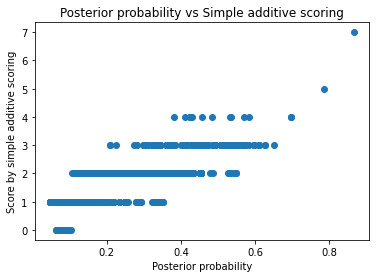

In [11]:
plt.scatter(posterior_array, score_array, s=None)
plt.ylabel('Score by simple additive scoring')
plt.xlabel('Posterior probability')
plt.title("Posterior probability vs Simple additive scoring")

Text(0.5, 1.0, 'Posterior probability vs cluster scoring')

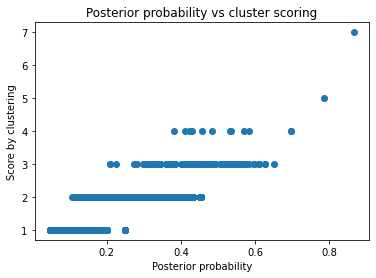

In [12]:
plt.scatter(posterior_array, bscore_array, s=None)
plt.xlabel("Posterior probability")
plt.ylabel("Score by clustering")
plt.title("Posterior probability vs cluster scoring")

# Reading data

In [13]:
# First append all
print("Collecting data")
data_list = []
b_rank_list = []
y_rank_list = []
for rank, cluster in enumerate(b_sorted_clusters):
    target_tuple = (rank, cluster.seq)
    b_rank_list.append(target_tuple)
for rank, cluster in enumerate(y_sorted_clusters):
    target_tuple = (rank, cluster.seq)
    y_rank_list.append(target_tuple)
# with open("Data.txt", 'r') as data:
#     for line in data:
#         A = line.rstrip().split('\t')
#         score = A[0]
#         posterior = A[1]
#         bscore = A[2]
#         target_tuple = (score, posterior, bscore)
#         data_list.append(target_tuple)
print("Done")

Done


# Rank by count vs Rank by posterior probability

In [14]:
rank_by_count = []
rank_by_post_prob = []

b_sorted_clusters = sorted(b_cluster_array, key=operator.attrgetter('post_prob', 'pid', 'prior'), reverse = True)
y_sorted_clusters = sorted(y_cluster_array, key=operator.attrgetter('post_prob', 'pid', 'prior'), reverse = True)

score_b_sorted_clusters = sorted(b_cluster_array, key=operator.attrgetter('score', 'pid', 'prior'), reverse = True)
score_y_sorted_clusters = sorted(y_cluster_array, key=operator.attrgetter('score', 'pid', 'prior'), reverse = True)

for i, cluster in enumerate(b_sorted_clusters):
    rank_by_post_prob.append(i)
    for j, cluster2 in enumerate(score_b_sorted_clusters):
        if cluster2.seq == cluster.seq:
            rank_by_count.append(j)
            break
for i, cluster in enumerate(y_sorted_clusters):
    rank_by_post_prob.append(i)
    for j, cluster2 in enumerate(score_y_sorted_clusters):
        if cluster2.seq == cluster.seq:
            rank_by_count.append(j)
            break


Text(0, 0.5, 'Rank by posterior probability')

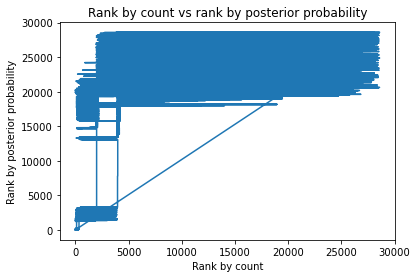

In [15]:
plt.plot(rank_by_count, rank_by_post_prob)
plt.title('Rank by count vs rank by posterior probability')
plt.xlabel('Rank by count')
plt.ylabel('Rank by posterior probability')

# To Filter data by parent prot

I want to be able to only view the b or y hits from a certain protein

In [16]:
# b_hits
target_pid = 274
b_target_clusters = []
for cluster in b_sorted_clusters:
    if cluster.pid == target_pid:
        b_target_clusters.append(cluster)

for cluster in b_target_clusters:
    non_indices = str(cluster.score) + '\t' + str(cluster.prob) + '\t' + str(cluster.pid) + '\t' + cluster.seq
    print(non_indices + '\t'+ '\t'.join([str(o) for o in cluster.indices]))


AttributeError: 'cluster' object has no attribute 'prob'

In [ ]:
# y_hits
target_pid = 274
y_target_clusters = []
for cluster in y_sorted_clusters:
    if cluster.pid == target_pid:
        y_target_clusters.append(cluster)

for cluster in y_target_clusters:
    non_indices = str(cluster.score) + '\t' + str(cluster.prob) + '\t' + str(cluster.pid) + '\t' + cluster.seq
    print(non_indices + '\t'+ '\t'.join([str(o) for o in cluster.indices]))

# See what non-hybrid solutions we can create

In [13]:
# b side starting. Ideally, we would probably pick the higher scoring side to start
filtered_b, filtered_y = testing_utils.get_top_X(b_sorted_clusters, y_sorted_clusters, 50)

# Calculating start and end indices for each interval
for b_cluster in filtered_b:
    interesting_combos = []
    b_index_set = set()
    for index in b_cluster.indices:
        index = index.replace('(', '')
        index = index.replace(')', '')
        A = index.rstrip().split(',')
        b_index_set.add(int(A[0]))
        b_index_set.add(int(A[1]))
    
    b_start_pos = min(b_index_set)
    b_end_pos = max(b_index_set)
    
    for y_cluster in filtered_y:
        y_index_set = set()
        for index in y_cluster.indices:
            index = index.replace('(', '')
            index = index.replace(')', '')
            A = index.rstrip().split(',')
            y_index_set.add(int(A[0]))
            y_index_set.add(int(A[1]))
            
        y_start_pos = min(y_index_set)
        y_end_pos = max(y_index_set)
        
        if (b_start_pos <= y_start_pos) and (b_end_pos == y_start_pos - 1):
            interesting_combos.append(b_cluster)
            interesting_combos.append(y_cluster)
    
    print(interesting_combos)

AttributeError: 'int' object has no attribute 'indices'